In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the API key.
from config import weather_api_key
# Import the requests library.
import requests

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

627

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | santa cruz
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | flinders
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | harare
Processing Record 9 of Set 1 | arraial do cabo
Processing Record 10 of Set 1 | phayao
Processing Record 11 of Set 1 | khatanga
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | rajura
Processing Record 14 of Set 1 | ambilobe
Processing Record 15 of Set 1 | ituni
City not found. Skipping...
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | zuwarah
Processing Record 18 of Set 1 | mahebourg
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | stantsiya gorchakovo
City not found. Skipping...
Processing Record 21 of Set

Processing Record 37 of Set 4 | namibe
Processing Record 38 of Set 4 | komsomolskiy
Processing Record 39 of Set 4 | qaanaaq
Processing Record 40 of Set 4 | okha
Processing Record 41 of Set 4 | hamilton
Processing Record 42 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 43 of Set 4 | kenora
Processing Record 44 of Set 4 | vestmannaeyjar
Processing Record 45 of Set 4 | montepuez
Processing Record 46 of Set 4 | sungaipenuh
Processing Record 47 of Set 4 | panjwin
City not found. Skipping...
Processing Record 48 of Set 4 | busembatia
Processing Record 49 of Set 4 | kavieng
Processing Record 50 of Set 4 | torbay
Processing Record 1 of Set 5 | gorom-gorom
Processing Record 2 of Set 5 | rovaniemi
Processing Record 3 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 4 of Set 5 | tanta
Processing Record 5 of Set 5 | warqla
City not found. Skipping...
Processing Record 6 of Set 5 | aleksandriya
Processing Record 7 of Set 5 | kavaratti
Processing Record 8 

Processing Record 25 of Set 8 | dwarka
Processing Record 26 of Set 8 | kautokeino
Processing Record 27 of Set 8 | santa maria
Processing Record 28 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 29 of Set 8 | bilibino
Processing Record 30 of Set 8 | tabuk
Processing Record 31 of Set 8 | dongkan
Processing Record 32 of Set 8 | pechora
Processing Record 33 of Set 8 | paamiut
Processing Record 34 of Set 8 | gaomi
Processing Record 35 of Set 8 | kalmunai
Processing Record 36 of Set 8 | saint-georges
Processing Record 37 of Set 8 | bathsheba
Processing Record 38 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 39 of Set 8 | mochudi
Processing Record 40 of Set 8 | arkhangelsk
Processing Record 41 of Set 8 | robertsport
Processing Record 42 of Set 8 | poplar bluff
Processing Record 43 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 44 of Set 8 | samdari
Processing Record 45 of Set 8 | danville
Processing Record 46 of Set 8 | asfi
Pro

Processing Record 17 of Set 12 | amaigbo
Processing Record 18 of Set 12 | santa fe
Processing Record 19 of Set 12 | coruripe
Processing Record 20 of Set 12 | touros
Processing Record 21 of Set 12 | urubicha
Processing Record 22 of Set 12 | warrington
Processing Record 23 of Set 12 | korhogo
Processing Record 24 of Set 12 | mormugao
Processing Record 25 of Set 12 | pala
Processing Record 26 of Set 12 | roald
Processing Record 27 of Set 12 | arman
Processing Record 28 of Set 12 | ksenyevka
City not found. Skipping...
Processing Record 29 of Set 12 | bam
Processing Record 30 of Set 12 | burns lake
Processing Record 31 of Set 12 | mayo
Processing Record 32 of Set 12 | mombaca
Processing Record 33 of Set 12 | yarada
Processing Record 34 of Set 12 | lakatoro
Processing Record 35 of Set 12 | high level
Processing Record 36 of Set 12 | vostok
Processing Record 37 of Set 12 | guilin
Processing Record 38 of Set 12 | greymouth
Processing Record 39 of Set 12 | vanavara
Processing Record 40 of Set 

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Santa Cruz,-17.8000,-63.1667,89.60,55,40,2.30,BO,2021-03-06 18:19:57
1,Albany,42.6001,-73.9662,26.01,47,47,1.01,US,2021-03-06 18:19:57
2,Rikitea,-23.1203,-134.9692,79.88,82,33,12.28,PF,2021-03-06 18:19:58
3,Mataura,-46.1927,168.8643,46.00,90,18,5.99,NZ,2021-03-06 18:19:58
4,Flinders,-34.5833,150.8552,63.00,78,96,1.01,AU,2021-03-06 18:19:59
5,Avarua,-21.2078,-159.7750,82.40,78,40,8.05,CK,2021-03-06 18:15:19
6,Harare,-17.8294,31.0539,66.99,78,77,1.01,ZW,2021-03-06 18:19:59
7,Arraial Do Cabo,-22.9661,-42.0278,86.00,61,40,11.50,BR,2021-03-06 18:19:59
8,Phayao,19.2500,100.2500,73.99,43,0,1.74,TH,2021-03-06 18:20:00
9,Khatanga,71.9667,102.5000,-21.51,86,36,11.01,RU,2021-03-06 18:20:00


In [9]:
new_column_order = ["City","Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Santa Cruz,BO,2021-03-06 18:19:57,-17.8000,-63.1667,89.60,55,40,2.30
1,Albany,US,2021-03-06 18:19:57,42.6001,-73.9662,26.01,47,47,1.01
2,Rikitea,PF,2021-03-06 18:19:58,-23.1203,-134.9692,79.88,82,33,12.28
3,Mataura,NZ,2021-03-06 18:19:58,-46.1927,168.8643,46.00,90,18,5.99
4,Flinders,AU,2021-03-06 18:19:59,-34.5833,150.8552,63.00,78,96,1.01
5,Avarua,CK,2021-03-06 18:15:19,-21.2078,-159.7750,82.40,78,40,8.05
6,Harare,ZW,2021-03-06 18:19:59,-17.8294,31.0539,66.99,78,77,1.01
7,Arraial Do Cabo,BR,2021-03-06 18:19:59,-22.9661,-42.0278,86.00,61,40,11.50
8,Phayao,TH,2021-03-06 18:20:00,19.2500,100.2500,73.99,43,0,1.74
9,Khatanga,RU,2021-03-06 18:20:00,71.9667,102.5000,-21.51,86,36,11.01


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

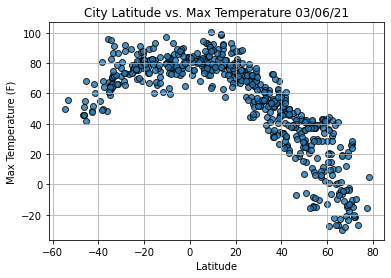

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

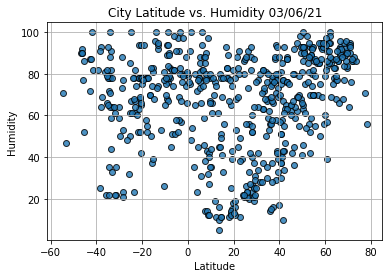

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

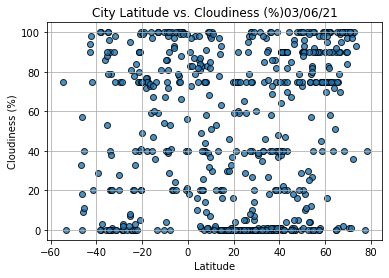

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%)"+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

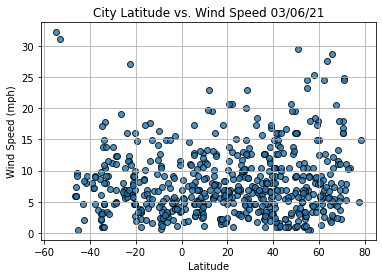

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()